# importing packages 

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
import cufflinks as cf
cf.go_offline()
from plotly.offline import iplot,plot,init_notebook_mode
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier


In [2]:
#reading the data set
df=pd.read_csv('loan_data.csv')

In [3]:
#check the top 5 values of the data set
df.head()

credit.policy             purpose  int.rate  installment  log.annual.inc   
0              1  debt_consolidation    0.1189       829.10       11.350407  \
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths   
0  19.48   737        5639.958333      28854        52.1               0  \
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

In [4]:
#check the tail values of the data set
df.tail()

credit.policy             purpose  int.rate  installment   
9573              0           all_other    0.1461       344.76  \
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util   
9573       12.180755  10.39   672       10474.000000     215372        82.1  \
9574       11.141862   0.21   722        4380.000000        184         1.1   
9575       10.596635  13.09   687        3450.041667      10036        82.9   
9576       10.819778  19.18   692        1800.000000          0         3.2   
9577       11.264464  16.28   732        4740.000000      37879        57.0   

      inq.last.6mths  delinq.2yrs  pub.rec  not.fully.paid  
9573               2            0        0               1  
9574               5            0        0               1  
9575               8            0        0               1  
9576               5            0        0               1  
9577               6            0        0               1

In [5]:
#check the shape of the data 
df.shape

(9578, 14)

In [6]:
#check the size of the data set
df.size

134092

In [7]:
#check the dtypes of the data types 
df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [8]:
#check the info of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [9]:
#check whether the null values are present in the data set
df.isna().sum().sum()

0

In [10]:
#check the column names of the data set
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [11]:
#in the above data set the not.fully .paid is dependent variable which we have to predict and other columns are the independent variables 

#check the description of the data set
df.describe()

credit.policy     int.rate  installment  log.annual.inc          dti   
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000  \
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util   
count  9578.000000        9578.000000  9.578000e+03  9578.000000  \
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.000000         178.958333  0.000000e+00     0.000000   
25%     682.000000        2820.000000  3.187000e+03    22.600000   
50%     707.000000        4139.958333  8.596000e+03    46.300000   
75%     737.000000        5730.000000  1.824950e+04    70.900000   
max     827.000000       17639.958330  1.207359e+06   119.000000   

       inq.last.6mths  delinq.2yrs      pub.rec  not.fully.paid  
count     9578.000000  9578.000000  9578.000000     9578.000000  
mean         1.577469     0.163708     0.062122        0.160054  
std          2.200245     0.546215     0.262126        0.366676  
min          0.000000     0.000000     0.000000        0.000000  
25%          0.000000     0.000000     0.000000        0.000000  
50%          1.000000     0.000000     0.000000        0.000000  
75%          2.000000     0.000000     0.000000        0.000000  
max         33.000000    13.000000     5.000000        1.000000

<Axes: >

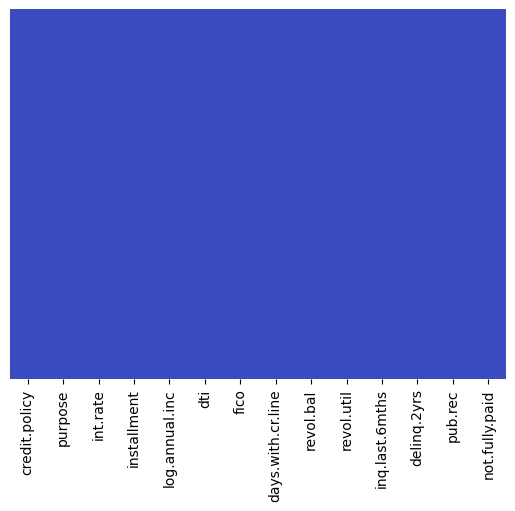

In [12]:
#now let us do some eda to about the data in details
sns.heatmap(df.isna(),yticklabels=False,cbar=False,cmap='coolwarm')

<Axes: xlabel='not.fully.paid', ylabel='count'>

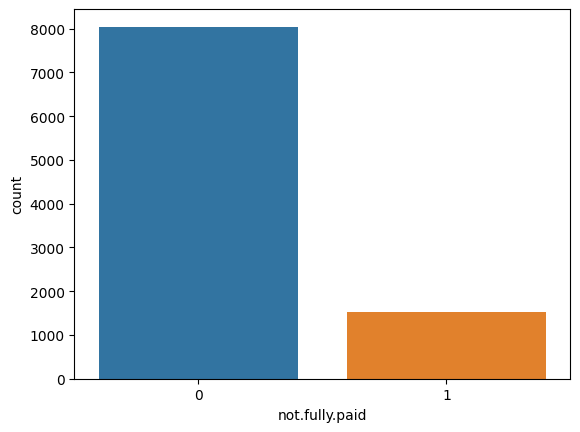

In [89]:
#let us look the data set is balanced or unbalanced 
sns.countplot(x='not.fully.paid',data=df)

In [90]:
#outr data set is the imbalanced data set

In [91]:
#the above plot shows that there was no null values in the data set


In [92]:
df.head()

credit.policy             purpose  int.rate  installment  log.annual.inc   
0              1  debt_consolidation    0.1189       829.10       11.350407  \
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths   
0  19.48   737        5639.958333      28854        52.1               0  \
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

<Axes: xlabel='credit.policy', ylabel='count'>

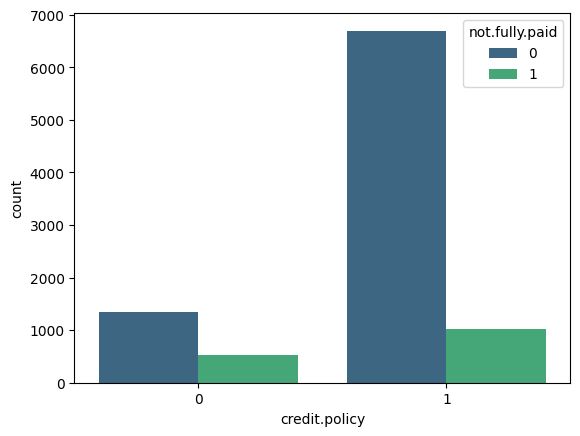

In [93]:
#check the credit.policy column
sns.countplot(x='credit.policy',data=df,palette='viridis',hue='not.fully.paid')

In [94]:
#there are more number of people who have taken the credit policy 

<Axes: xlabel='not.fully.paid', ylabel='int.rate'>

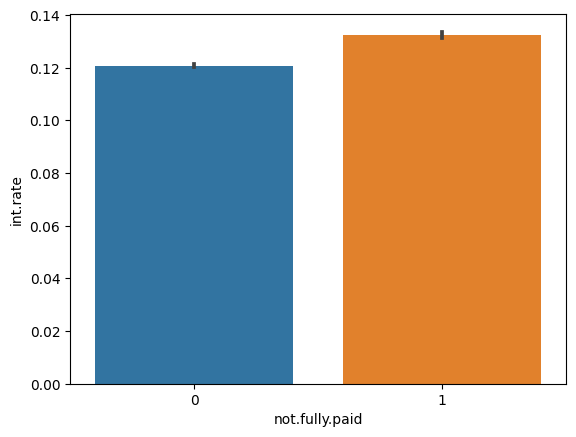

In [95]:
#check the interest rate of paid people and not paid people
sns.barplot(x='not.fully.paid',y='int.rate',data=df)

In [96]:
sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

<Axes: xlabel='not.fully.paid', ylabel='log.annual.inc'>

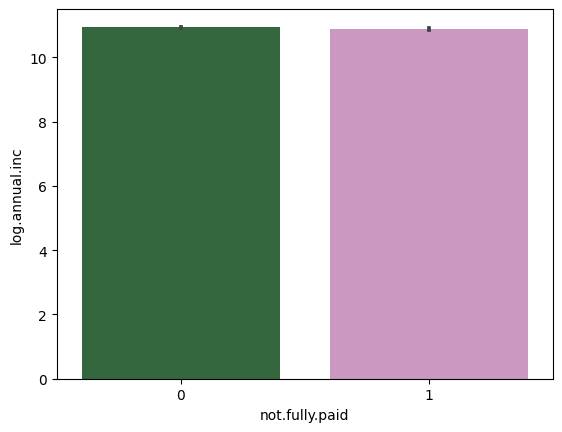

In [19]:
#check the annual income vs fully paid or not
sns.barplot(x='not.fully.paid',y='log.annual.inc',data=df,palette='cubehelix')

In [20]:
df.iplot(kind='hist')

In [21]:
#now let us check other plots
df.iplot(kind='box')

In [22]:
#from the above figures we can say that there are no outliers in our data set

In [29]:
num=df.select_dtypes(include=np.number)

<Axes: >

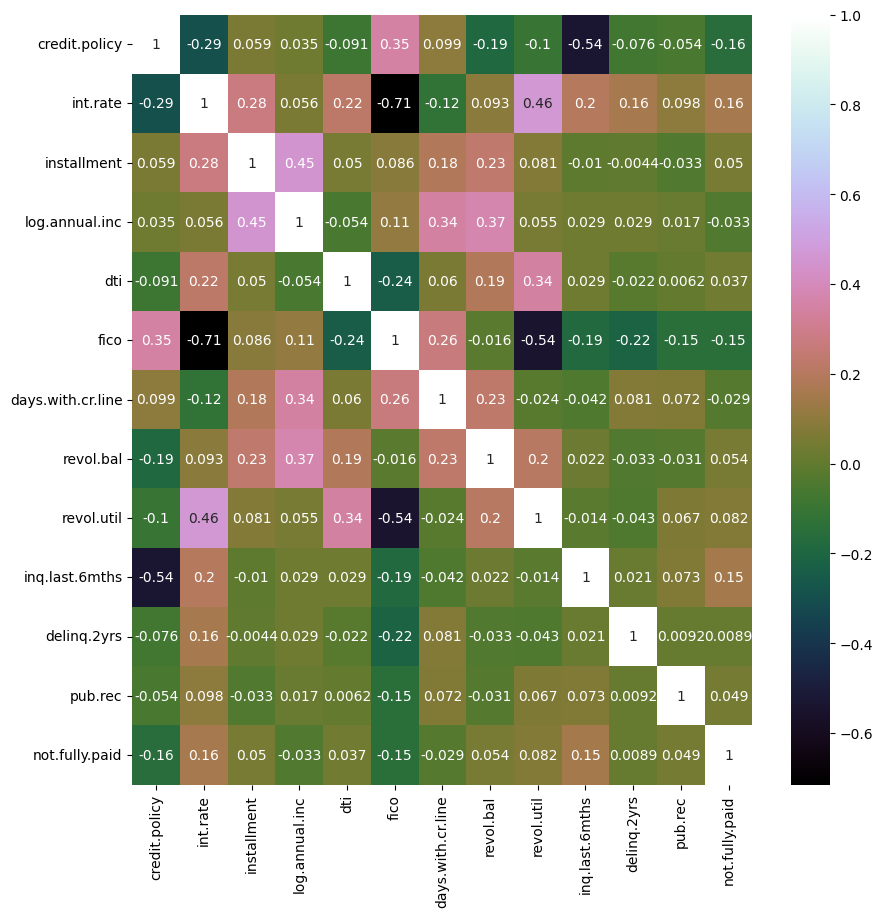

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(num.corr(),annot=True,cmap='cubehelix')

<Axes: xlabel='log.annual.inc', ylabel='not.fully.paid'>

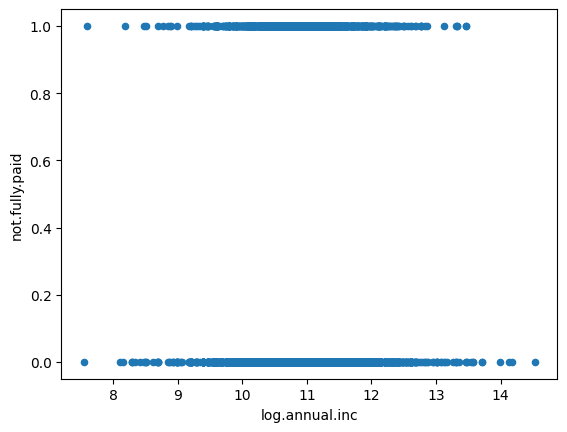

In [37]:
df.plot.scatter(x='log.annual.inc',y='not.fully.paid')

In [38]:
#now let us separate the data into categorical and numericsl data type
cat=df.select_dtypes(exclude=np.number)
numer=df.select_dtypes(include=np.number)

In [39]:
numer.head()

credit.policy  int.rate  installment  log.annual.inc    dti  fico   
0              1    0.1189       829.10       11.350407  19.48   737  \
1              1    0.1071       228.22       11.082143  14.29   707   
2              1    0.1357       366.86       10.373491  11.63   682   
3              1    0.1008       162.34       11.350407   8.10   712   
4              1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs   
0        5639.958333      28854        52.1               0            0  \
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  not.fully.paid  
0        0               0  
1        0               0  
2        0               0  
3        0               0  
4        0               0

In [40]:
cat.head()

purpose
0  debt_consolidation
1         credit_card
2  debt_consolidation
3  debt_consolidation
4         credit_card

In [50]:
len(df['purpose'].unique())

7

<Axes: xlabel='purpose', ylabel='count'>

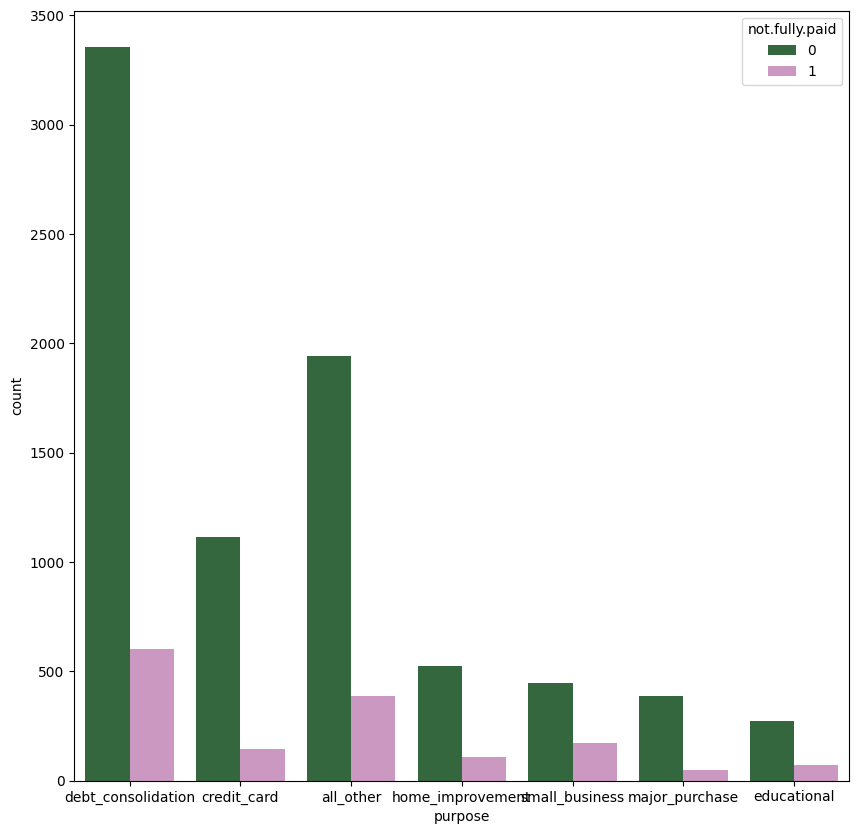

In [44]:
#so let us check the unique values of the purpose column
plt.figure(figsize=(10,10))
sns.countplot(x='purpose',data=df,palette='cubehelix',hue='not.fully.paid')

In [45]:
#mostly people have taken the loan for the dept consolidation

In [56]:
#let us do the categorical encoding for the categorical data 
cate=pd.get_dummies(cat,drop_first=True).astype('int')

In [57]:
#now create our new data 
df1=pd.concat([cate,num],axis=1)

In [58]:
df1.head()

purpose_credit_card  purpose_debt_consolidation  purpose_educational   
0                    0                           1                    0  \
1                    1                           0                    0   
2                    0                           1                    0   
3                    0                           1                    0   
4                    1                           0                    0   

   purpose_home_improvement  purpose_major_purchase  purpose_small_business   
0                         0                       0                       0  \
1                         0                       0                       0   
2                         0                       0                       0   
3                         0                       0                       0   
4                         0                       0                       0   

   credit.policy  int.rate  installment  log.annual.inc    dti  fico   
0              1    0.1189       829.10       11.350407  19.48   737  \
1              1    0.1071       228.22       11.082143  14.29   707   
2              1    0.1357       366.86       10.373491  11.63   682   
3              1    0.1008       162.34       11.350407   8.10   712   
4              1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs   
0        5639.958333      28854        52.1               0            0  \
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  not.fully.paid  
0        0               0  
1        0               0  
2        0               0  
3        0               0  
4        0               0

In [64]:
#now let us divide our data into the independent and dependent variables 
x=df1.drop('not.fully.paid',axis=1)
y=df1['not.fully.paid']

In [65]:
#splitting of the data 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [66]:
#get the shape of the training and testing data set
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(6704, 18)
(2874, 18)
(6704,)
(2874,)


In [67]:
dec=DecisionTreeClassifier()

In [81]:
#training model

In [82]:
dec.fit(x_train,y_train)

DecisionTreeClassifier()

In [83]:
#making predictions
pred=dec.predict(x_test)

In [87]:
pred[0:100]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

<Axes: >

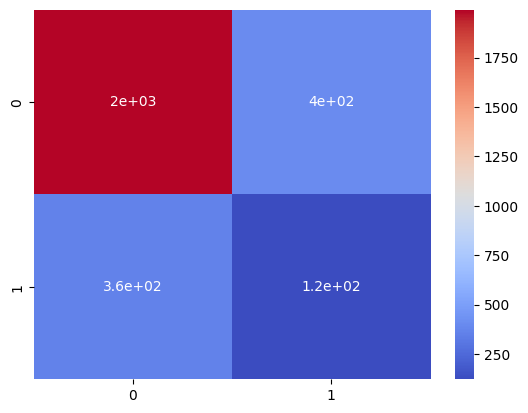

In [99]:
sns.heatmap(confusion_matrix(y_test,pred),cmap='coolwarm',annot=True)

In [100]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2395
           1       0.23      0.25      0.24       479

    accuracy                           0.74      2874
   macro avg       0.54      0.54      0.54      2874
weighted avg       0.75      0.74      0.74      2874



In [102]:
#importing the random forest classifier
rand=RandomForestClassifier()

In [103]:
rand.fit(x_train,y_train)

RandomForestClassifier()

In [104]:
preds=rand.predict(x_test)

<Axes: >

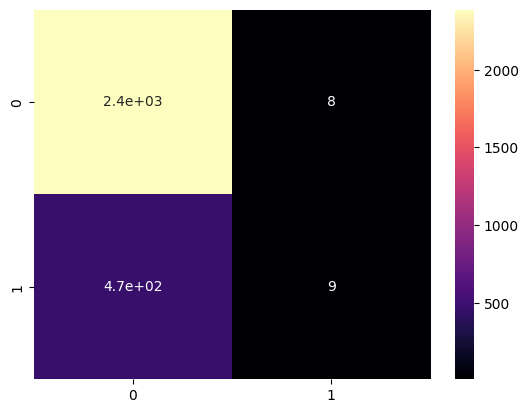

In [105]:
sns.heatmap(confusion_matrix(y_test,preds),annot=True,cmap='magma')

In [106]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2395
           1       0.53      0.02      0.04       479

    accuracy                           0.83      2874
   macro avg       0.68      0.51      0.47      2874
weighted avg       0.78      0.83      0.76      2874



In [108]:
#____________________________________________end____________________________________________________